In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [224]:
%matplotlib inline

<div id="rmse" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="https://miro.medium.com/max/327/1*9hQVcasuwx5ddq_s3MFCyw.gif" style="align:center"/> </div>
  <div style="float:left;width: 85%;"><label></label></div>
</div>


In [225]:
df= pd.read_csv('./data/df_total.csv')

In [226]:
df.sample(1)

,Unnamed: 0,property_type,lat,lon,price_aprox_usd,surface_covered_in_m2,ciudad_barrio,sub_loc,distance_obelisco,precio_m2,segmento_precio_m2,segmento_precio_m2_ordinal
69982,41258,house,-34.415918,-58.871507,310000.0,256.0,Pilar,Villa Rosa,55674.494166,959.752322,bajo,2


In [227]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [228]:
from sklearn.model_selection import cross_validate

In [229]:
def reg_lineal_multiple(data, features):

    X = data[features]
    y = data.price_aprox_usd

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

    X = sm.add_constant(X_train)

    lm = sm.OLS(y_train, X_train).fit() 
    

    cv = cross_validate(estimator=linear_model.LinearRegression(), X=X_train, y=y_train, scoring=['neg_root_mean_squared_error', 'r2'], cv=3)


    return cv, lm

In [230]:
cv_tot, lm_tot = reg_lineal_multiple(df,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco'] )

In [231]:
lm_tot.summary()        

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                          6.162e+04
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:13:22   Log-Likelihood:                     -9.3497e+05
No. Observations:               70758   AIC:                                  1.870e+06
Df Residuals:                   70753   BIC:                                  1.870e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1480.0385      4.503    328.688      0.000    1471.213    1488.864
lat                    1076.9199    237.590      4.533      0.000     611.244    1542.595
lon                    1264.6476    143.395      8.819      0.000     983.594    1545.701
precio_m2                87.3433      0.557    156.718      0.000      86.251      88.436
distance_obelisco        -0.0218      0.003     -8.461      0.000      -0.027      -0.017
==============================================================================
Omnibus:                    42239.647   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2141687.594
Skew:                           2.189   Prob(JB):                         0.00
Kurtosis:                      29.594   Cond. No.                     1.66e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
cv_tot

{'fit_time': array([0.01011443, 0.        , 0.00900841]),
 'score_time': array([0.        , 0.01697254, 0.0039959 ]),
 'test_neg_root_mean_squared_error': array([-129846.90934102, -131849.53459773, -135445.31156715]),
 'test_r2': array([0.62852189, 0.63058781, 0.61366405])}

In [233]:
def error(ground_truth, prediction):

    r2 = r2_score(ground_truth, prediction)
    RMSE = mean_squared_error(ground_truth, prediction, squared= False)


    print('R2:' , round(r2, 4))
    print ('RMSE:' , round(RMSE))

    return r2, RMSE

In [234]:
X = df[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco']]
y = df.price_aprox_usd
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [235]:
#errores en test
predictions = lm_tot.predict(X_test)

error(y_test, predictions)

R2: 0.6274
RMSE: 132198


(0.6274262499135732, 132197.57962051066)

In [236]:
#errores en train
predictions = lm_tot.predict(X_train)

error(y_train, predictions)

R2: 0.6233
RMSE: 132553


(0.6233279251233403, 132552.99019628056)

## Departamento

In [237]:
df_depto= pd.read_csv('./data/df_depto.csv')

In [238]:
cv_depto, lm_depto = reg_lineal_multiple(df_depto,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco'] )
lm_depto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                          4.181e+04
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:13:22   Log-Likelihood:                     -5.3733e+05
No. Observations:               41874   AIC:                                  1.075e+06
Df Residuals:                   41869   BIC:                                  1.075e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  2347.1428     11.925    196.824      0.000    2323.769    2370.516
lat                    1946.0906    220.483      8.826      0.000    1513.939    2378.242
lon                    1276.1756    133.516      9.558      0.000    1014.481    1537.871
precio_m2                73.4361      0.518    141.720      0.000      72.420      74.452
distance_obelisco        -0.0163      0.003     -6.275      0.000      -0.021      -0.011
==============================================================================
Omnibus:                    39017.400   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2269537.297
Skew:                           4.410   Prob(JB):                         0.00
Kurtosis:                      37.971   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [239]:
cv_depto

{'fit_time': array([0.0059998 , 0.00599837, 0.00685644]),
 'score_time': array([0.00400066, 0.00300169, 0.00300312]),
 'test_neg_root_mean_squared_error': array([-90512.53052934, -91426.12337188, -89361.10118498]),
 'test_r2': array([0.62016164, 0.63474404, 0.63465903])}

## Casas


In [240]:
df_casa= pd.read_csv('./data/df_casa.csv')

In [241]:
cv_casa, lm_casa = reg_lineal_multiple(df_casa,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco'] )
lm_casa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                          2.212e+04
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:13:23   Log-Likelihood:                     -3.1653e+05
No. Observations:               23469   AIC:                                  6.331e+05
Df Residuals:                   23464   BIC:                                  6.331e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1383.8976      8.820    156.906      0.000    1366.610    1401.185
lat                   -1046.2859    510.959     -2.048      0.041   -2047.798     -44.774
lon                    2859.1893    308.802      9.259      0.000    2253.917    3464.462
precio_m2               132.6480      1.668     79.545      0.000     129.379     135.917
distance_obelisco        -0.0253      0.005     -4.909      0.000      -0.035      -0.015
==============================================================================
Omnibus:                    12017.682   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           342195.799
Skew:                           1.897   Prob(JB):                         0.00
Kurtosis:                      21.318   Cond. No.                     1.79e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [242]:
cv_casa

{'fit_time': array([0.00699973, 0.00500393, 0.00400352]),
 'score_time': array([0.00399613, 0.00199652, 0.00299859]),
 'test_neg_root_mean_squared_error': array([-179133.02876885, -168975.69527524, -173811.68606442]),
 'test_r2': array([0.59319094, 0.5921838 , 0.59526474])}

## Store


In [243]:
df_store = pd.read_csv('./data/df_store.csv')

In [244]:
cv_store, lm_store = reg_lineal_multiple(df_store,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco'] )
lm_store.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              1819.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:13:23   Log-Likelihood:                         -28807.
No. Observations:                2113   AIC:                                  5.762e+04
Df Residuals:                    2108   BIC:                                  5.765e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1147.5411     20.455     56.100      0.000    1107.427    1187.656
lat                   -1254.4138   1788.917     -0.701      0.483   -4762.641    2253.814
lon                    2753.5695   1064.992      2.586      0.010     665.024    4842.115
precio_m2               108.2138      3.626     29.842      0.000     101.103     115.325
distance_obelisco         0.0269      0.016      1.646      0.100      -0.005       0.059
==============================================================================
Omnibus:                      649.495   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5075.262
Skew:                           1.227   Prob(JB):                         0.00
Kurtosis:                      10.185   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
cv_store

{'fit_time': array([0.00399828, 0.00400043, 0.00300622]),
 'score_time': array([0.00400019, 0.00299478, 0.00299835]),
 'test_neg_root_mean_squared_error': array([-207406.799876  , -201183.64350331, -198033.57273149]),
 'test_r2': array([0.61667837, 0.60017834, 0.63444208])}

## PH


In [246]:
df_ph= pd.read_csv('./data/df_ph.csv')

In [247]:
cv_ph, lm_ph = reg_lineal_multiple(df_ph,['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco'] )
lm_ph.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              7043.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                        0.00
Time:                        16:13:23   Log-Likelihood:                         -40026.
No. Observations:                3300   AIC:                                  8.006e+04
Df Residuals:                    3295   BIC:                                  8.009e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1195.9148     19.460     61.453      0.000    1157.759    1234.071
lat                    2323.3592    416.193      5.582      0.000    1507.336    3139.382
lon                    -652.8908    255.128     -2.559      0.011   -1153.117    -152.665
precio_m2                53.6693      1.347     39.852      0.000      51.029      56.310
distance_obelisco        -0.0376      0.004     -9.003      0.000      -0.046      -0.029
==============================================================================
Omnibus:                      477.241   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4036.350
Skew:                           0.416   Prob(JB):                         0.00
Kurtosis:                       8.354   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
cv_ph

{'fit_time': array([0.00299191, 0.00300431, 0.00399804]),
 'score_time': array([0.00200129, 0.00199866, 0.00199842]),
 'test_neg_root_mean_squared_error': array([-44227.13994483, -45296.90119278, -44364.84671731]),
 'test_r2': array([0.61799237, 0.59850453, 0.60945853])}

In [249]:
rmse_dict = {'RMSE_ph' : cv_ph['test_neg_root_mean_squared_error'] , 'RMSE_casa':cv_casa['test_neg_root_mean_squared_error'], 'RMSE_depto':cv_depto['test_neg_root_mean_squared_error'], 'RMSE_store':cv_store['test_neg_root_mean_squared_error'], 'RMSE':cv_tot['test_neg_root_mean_squared_error']}

In [250]:
df_plot = pd.DataFrame(rmse_dict)

In [251]:
df_plot[['RMSE', 'RMSE_store','RMSE_casa', 'RMSE_depto', 'RMSE_ph']] = df_plot[['RMSE', 'RMSE_store','RMSE_casa', 'RMSE_depto', 'RMSE_ph']] * -1

In [252]:
df_plot['model'] = 'multivariable'

<AxesSubplot:>

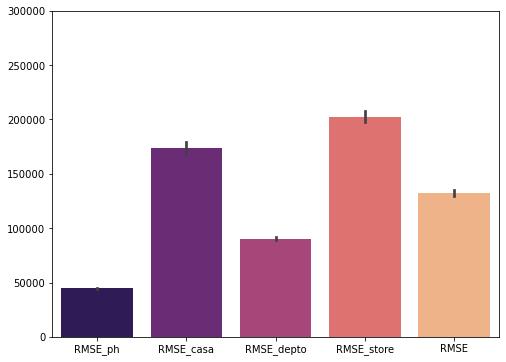

In [253]:
plt.figure(figsize=(8, 6))
plt.ylim(0, 300000)
sns.barplot(data=df_plot, palette= 'magma')

In [254]:
df_RMSE_lineal = pd.read_csv('./data/RMSE_lineal_simple.csv')

In [255]:
df_RMSE_lineal['model'] ='lineal'

In [256]:
df_plot = pd.concat([df_RMSE_lineal,df_plot])

In [257]:
df_plot = pd.melt(df_plot, id_vars=['model'])

In [258]:
df_plot.sample(2)

,model,variable,value
23,multivariable,RMSE_store,198033.572731
0,lineal,RMSE_ph,56099.575297


<AxesSubplot:xlabel='variable', ylabel='value'>

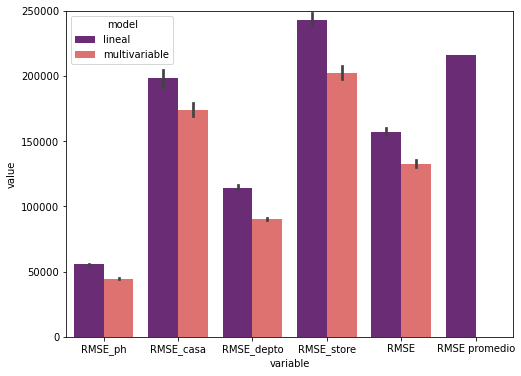

In [259]:
plt.figure(figsize=(8, 6))
plt.ylim(0, 250000)
sns.barplot(data= df_plot, x ='variable', y= 'value', hue= 'model', palette= 'magma')

### Regularización

#### L2 = Regularización con Ridge

In [260]:
# Regularización con Ridge

from sklearn.preprocessing import StandardScaler

X = df[['lat', 'lon', 'surface_covered_in_m2', 'distance_obelisco', 'precio_m2']]

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

y = df['price_aprox_usd']

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 117)

model_ridge_cv = linear_model.RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0, 20, 50, 100], 
                                   fit_intercept=True, scoring='neg_root_mean_squared_error', normalize=False, cv=10)

model_fit_ridge_cv = model_ridge_cv.fit(X_train, y_train)

print('El mejor valor de  𝜆  es:')
print(model_fit_ridge_cv.alpha_)
print('El valor de  𝑅MSE  en train es:')
print(model_fit_ridge_cv.best_score_)

El mejor valor de  𝜆  es:
10.0
El valor de  𝑅MSE  en train es:
-132403.89670895878


In [262]:
best_alpha = model_fit_ridge_cv.alpha_
model_ridge = linear_model.Ridge(alpha = best_alpha, fit_intercept = True, normalize = False)
model_fit_ridge = model_ridge.fit(X_train, y_train)
print(model_fit_ridge.coef_)
print(model_fit_ridge.intercept_)
print(model_fit_ridge.score(X_train, y_train))

[ -1791.7478231  -15079.87542545 168647.89079284 -21094.95631564
  83941.60468743]
217501.01338899572
0.6269125760161969


In [263]:
pred= model_fit_ridge.predict(X_test)

In [264]:
r2, RMSE_ridge = error(y_test, pred )

R2: 0.6219
RMSE: 131919


In [265]:
df_plot = df_plot.append({'model': 'Ridge' ,'variable': 'RMSE',	'value' : RMSE_ridge}, ignore_index=True)

In [266]:
df_plot

,model,variable,value
0,lineal,RMSE_ph,56099.575297
1,lineal,RMSE_ph,55258.360912
2,lineal,RMSE_ph,56152.490413
3,multivariable,RMSE_ph,44227.139945
4,multivariable,RMSE_ph,45296.901193
5,multivariable,RMSE_ph,44364.846717
6,lineal,RMSE_casa,204323.844514
7,lineal,RMSE_casa,191733.356984
8,lineal,RMSE_casa,199166.128193
9,multivariable,RMSE_casa,179133.028769


<AxesSubplot:xlabel='model', ylabel='value'>

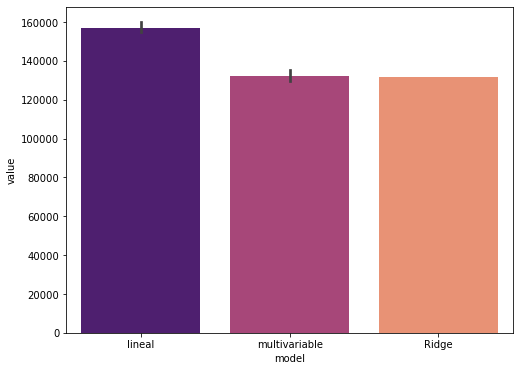

In [267]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'model', y= 'value', data= df_plot[df_plot.variable == 'RMSE'], palette='magma')

## Lasso

In [268]:
X_train

array([[ 0.66808886, -0.60159852, -0.74229355,  0.48148636, -0.37820461],
       [-1.88734742,  0.77536551, -0.56678943,  0.2885108 , -1.33564433],
       [-0.07468498,  0.42029578, -0.23333161, -0.57982761, -0.31637733],
       ...,
       [-1.84159266,  0.77803925,  1.20580215,  0.27139062, -1.22506348],
       [-0.00584915,  0.35870019,  3.84713911, -0.51702719,  0.49958574],
       [-0.07016067,  0.41041233, -0.54923902, -0.57572902,  1.5875365 ]])

In [269]:
alphas = np.logspace(-2,7,20)

error_test_lista = []
error_train_lista = []

params = pd.DataFrame()

for alpha in alphas:
#     print(alpha, end = ', ')
    lasso = linear_model.Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    params = pd.concat([params,pd.DataFrame({f'{alpha}':lasso.coef_})], axis = 1)
    
    error_train = mean_squared_error(y_train, lasso.predict(X_train), squared=False)
    error_test  = mean_squared_error(y_test,  lasso.predict(X_test), squared=False)
    
    error_test_lista.append( error_test )
    error_train_lista.append(error_train)

In [270]:
alphas

array([1.00000000e-02, 2.97635144e-02, 8.85866790e-02, 2.63665090e-01,
       7.84759970e-01, 2.33572147e+00, 6.95192796e+00, 2.06913808e+01,
       6.15848211e+01, 1.83298071e+02, 5.45559478e+02, 1.62377674e+03,
       4.83293024e+03, 1.43844989e+04, 4.28133240e+04, 1.27427499e+05,
       3.79269019e+05, 1.12883789e+06, 3.35981829e+06, 1.00000000e+07])

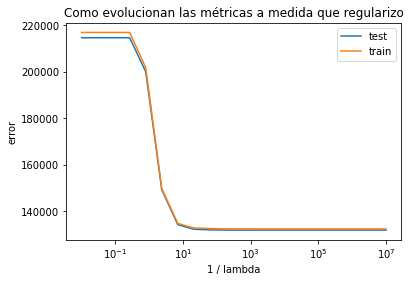

In [271]:
plt.plot(alphas[::-1], error_test_lista, label = 'test')
plt.plot(alphas[::-1], error_train_lista, label = 'train')


plt.title('Como evolucionan las métricas a medida que regularizo')
plt.legend()
plt.xlabel('1 / lambda')
plt.ylabel('error')
plt.xscale('log')
plt.show()

In [272]:
error_test_lista

[131918.37198617708,
 131918.3709929556,
 131918.36803936426,
 131918.35923269443,
 131918.3331088716,
 131918.25553238302,
 131918.02828729013,
 131917.37892256447,
 131915.69240070527,
 131912.9648445465,
 131922.9528893627,
 132029.93082960902,
 132286.2954173836,
 134268.5042650066,
 149271.07278061498,
 199912.4768297352,
 214528.31170261183,
 214528.31170261183,
 214528.31170261183,
 214528.31170261183]

In [273]:
params

,0.01,0.029763514416313176,0.08858667904100823,0.26366508987303583,0.7847599703514611,2.3357214690901213,6.951927961775605,20.69138081114788,61.584821106602604,183.29807108324337,545.5594781168514,1623.776739188721,4832.930238571752,14384.498882876629,42813.32398719387,127427.49857031321,379269.0190732246,1128837.8916846884,3359818.2862837743,10000000.0
0,-1793.782650,-1793.739653,-1793.611743,-1793.230424,-1792.096949,-1788.717975,-1778.677161,-1748.771727,-1659.807209,-1404.588297,-626.898088,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
1,-15105.629515,-15105.383458,-15104.651588,-15102.468599,-15095.982419,-15076.636450,-15019.179590,-14848.011891,-14338.896494,-12904.805341,-8465.925134,-0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,168677.418253,168677.397334,168677.335067,168677.149798,168676.598228,168674.957085,168670.070885,168655.529834,168612.246202,168482.500638,168098.031418,166869.846086,162742.853797,150386.289970,113326.582180,22774.841104,0.0,0.0,0.0,0.0
3,-21117.170671,-21116.936837,-21116.241301,-21114.166912,-21108.002870,-21089.619705,-21035.016353,-20872.357008,-20388.532090,-19021.797834,-14799.905070,-6301.519795,-3932.054866,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
4,83960.832448,83960.823483,83960.796774,83960.717517,83960.481055,83959.779322,83957.684481,83951.457370,83932.906135,83873.705323,83705.654151,82918.791704,79347.486863,67816.018914,30109.291593,0.000000,0.0,0.0,0.0,0.0


In [274]:
df_plot = df_plot.append({'model': 'Lasso' ,'variable': 'RMSE',	'value' : error_test_lista[0]}, ignore_index=True)

In [275]:
params_to_plot = params
alphas_to_plot = params_to_plot.columns
alphas_to_plot = np.array(alphas_to_plot, dtype = 'float')

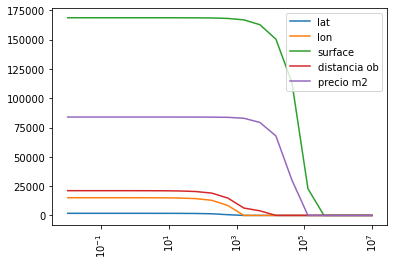

In [276]:
plt.plot(alphas_to_plot, np.abs(params_to_plot.loc[0].values), label = 'lat')
plt.plot(alphas_to_plot, np.abs(params_to_plot.loc[1].values), label = 'lon')
plt.plot(alphas_to_plot, np.abs(params_to_plot.loc[2].values), label = 'surface')
plt.plot(alphas_to_plot, np.abs(params_to_plot.loc[3].values), label = 'distancia ob')
plt.plot(alphas_to_plot, np.abs(params_to_plot.loc[4].values), label = 'precio m2')
# plt.plot(alphas_to_plot, np.abs(params_to_plot.loc[5].values), label = 'b5')
# plt.plot(alphas_to_plot, np.abs(params_to_plot.loc[6].values), label = 'b6')

plt.legend()
plt.xticks(rotation = 90)
plt.xscale('log')
plt.show()

<AxesSubplot:xlabel='model', ylabel='value'>

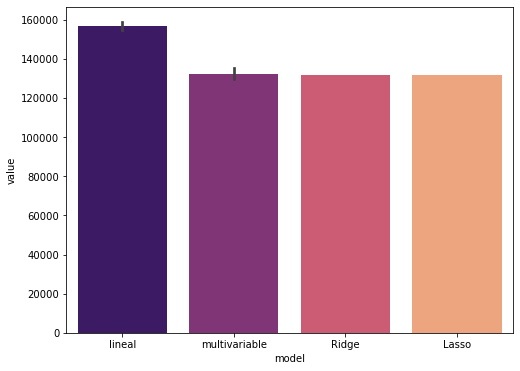

In [277]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'model', y= 'value', data= df_plot[df_plot.variable == 'RMSE'], palette='magma')

## XGBoost

In [278]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [279]:
X= df[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2', 'distance_obelisco',  'property_type']]
X_encoded = pd.get_dummies(X, columns=['property_type'], sparse=True)
y = df.price_aprox_usd
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=7)

In [280]:
X_train.sample(2)

,surface_covered_in_m2,lat,lon,precio_m2,distance_obelisco,property_type_PH,property_type_apartment,property_type_house,property_type_store
90115,130.0,-34.63004,-58.524883,1484.615833,16029.19863,1,0,0,0
64057,190.0,-31.38194,-64.055450,1552.631579,655343.37360,0,0,1,0


In [281]:
rg_xgb = xgb.XGBRegressor( learning_rate=0.5, max_depth=6, reg_lambda=5)
rg_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_set=[(X_test,y_test)])

[0]	validation_0-rmse:185154.87500
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:134145.20312
[2]	validation_0-rmse:113669.21094
[3]	validation_0-rmse:105889.09375
[4]	validation_0-rmse:101599.95312
[5]	validation_0-rmse:98923.00781
[6]	validation_0-rmse:98193.81250
[7]	validation_0-rmse:97674.92969
[8]	validation_0-rmse:97552.78906
[9]	validation_0-rmse:96756.07812
[10]	validation_0-rmse:96383.92188
[11]	validation_0-rmse:96310.66406
[12]	validation_0-rmse:95924.18750
[13]	validation_0-rmse:96135.67969
[14]	validation_0-rmse:96056.56250
[15]	validation_0-rmse:95896.42188
[16]	validation_0-rmse:95448.62500
[17]	validation_0-rmse:95185.41406
[18]	validation_0-rmse:95246.31250
[19]	validation_0-rmse:95106.76562
[20]	validation_0-rmse:94629.31250
[21]	validation_0-rmse:94533.46875
[22]	validation_0-rmse:94367.35156
[23]	validation_0-rmse:94204.08594
[24]	validation_0-rmse:94167.40625
[25]	validation_0-rmse:94166.77344
[26]	validation_0-rmse:94311.1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [282]:
pred = rg_xgb.predict(X_test)

In [283]:
from sklearn.model_selection import GridSearchCV

In [284]:
# param_grid = {
#     'max_depth': [4,5,6],
#     'learning_rate': [0.9, 0.7,0.5,0,3],
#     'gamma':[0, 0.25, 1],
#     'reg_lambda':[1.0, 10, 30],
#     'scale_pos_weight':[1,3,5]}
   

In [285]:
param_grid = {
    'max_depth': [6, 7],
    'learning_rate': [0.7,0.5,0.3],
    'reg_lambda':[5,7,8]}

In [286]:
optimal_params= GridSearchCV(
    estimator=xgb.XGBRegressor(),
    param_grid=param_grid,
    scoring= 'neg_root_mean_squared_error',
    verbose=2,
    n_jobs=10,
    cv=3)


In [287]:
optimal_params.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   42.5s
[Parallel(n_jobs=10)]: Done  54 out of  54 | elapsed:  1.6min finished


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [288]:
print(optimal_params.best_score_)
print(optimal_params.best_params_)

-92599.2615671216
{'learning_rate': 0.3, 'max_depth': 7, 'reg_lambda': 7}


In [289]:
rg_xgb.feature_importances_.sum()

0.99999994

<BarContainer object of 9 artists>

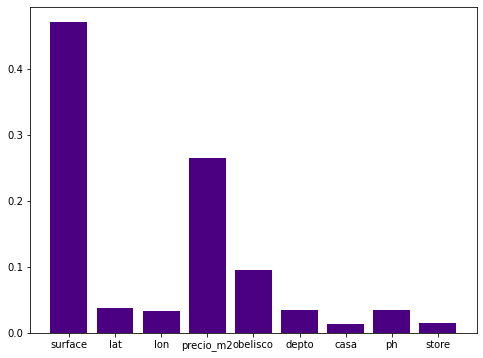

In [290]:
plt.figure(figsize=(8, 6))
plt.bar( ['surface', 'lat', 'lon', 'precio_m2','obelisco', 'depto', 'casa', 'ph', 'store'],rg_xgb.feature_importances_[0:9], color= 'indigo')

In [291]:
df_plot = df_plot.append({'model': 'XGBoost' ,'variable': 'RMSE',	'value' : (-optimal_params.best_score_)}, ignore_index=True)

<AxesSubplot:xlabel='model', ylabel='value'>

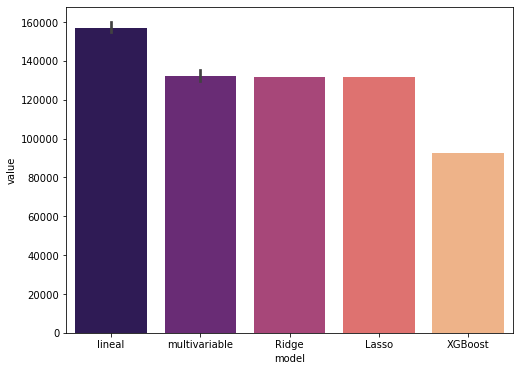

In [292]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'model', y= 'value', data= df_plot[df_plot.variable == 'RMSE'], palette='magma')